# Homework 6 - Naive Bayes and Decision Tree for Digit Recognition
## IST 707 Applied Machine Learning

## Load data and libraries

In [18]:
import sys

import sklearn
import numpy as np
import pandas as pd
import os
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from scipy.spatial import distance_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from graphviz import Source
from sklearn.tree import export_graphviz
# for consistent output
np.random.seed(2022)

# To plot charts
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)

In [19]:
#Import dataset

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit-train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit-test.csv')

In [20]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data pre-processing

In [22]:
train_images = train.iloc[:,1:784]
train_labels = train.iloc[:,:1] # for the labels to be a dataframe
train_labels.head()

,label
0,3
1,5
2,3
3,2
4,0


In [23]:
test_images = test.iloc[:,1:784]
test_labels = test.iloc[:,:1] # for the labels to be a dataframe
test_labels.head()

,label
0,0
1,0
2,7
3,3
4,5


In [24]:
#Check for missing values

train_labels.isna().sum()

label    0
dtype: int64

There are no missing values

## Decision Tree

First a base decision tree model is creates and trained using the whole training dataset and then 5-fold cross validation is performed for training the model and the difference between the 2 models is compared.

In [25]:
# create model
tree_clf = DecisionTreeClassifier()

In [26]:
# train model
tree_clf.fit(train_images, train_labels)

DecisionTreeClassifier()

In [27]:
# Predict and evaluate model accuracy
# Test accuracy based on y_test

y_pred = tree_clf.predict(test_images)

print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))
# print("AUC:", metrics.roc_auc_score(test_labels, tree_clf.predict_proba(test_images)[:, 1]))

Accuracy: 0.7863268222963316


In [28]:
train.columns[0]

'label'

In [34]:
# # visualize the model's decision tree

# export_graphviz(tree_clf, out_file = "digitDecisionTree.dot", feature_names = train.columns[1:],
#                 # class_names = train.columns[0],
#                 # rounded = True,
#                 filled = True)

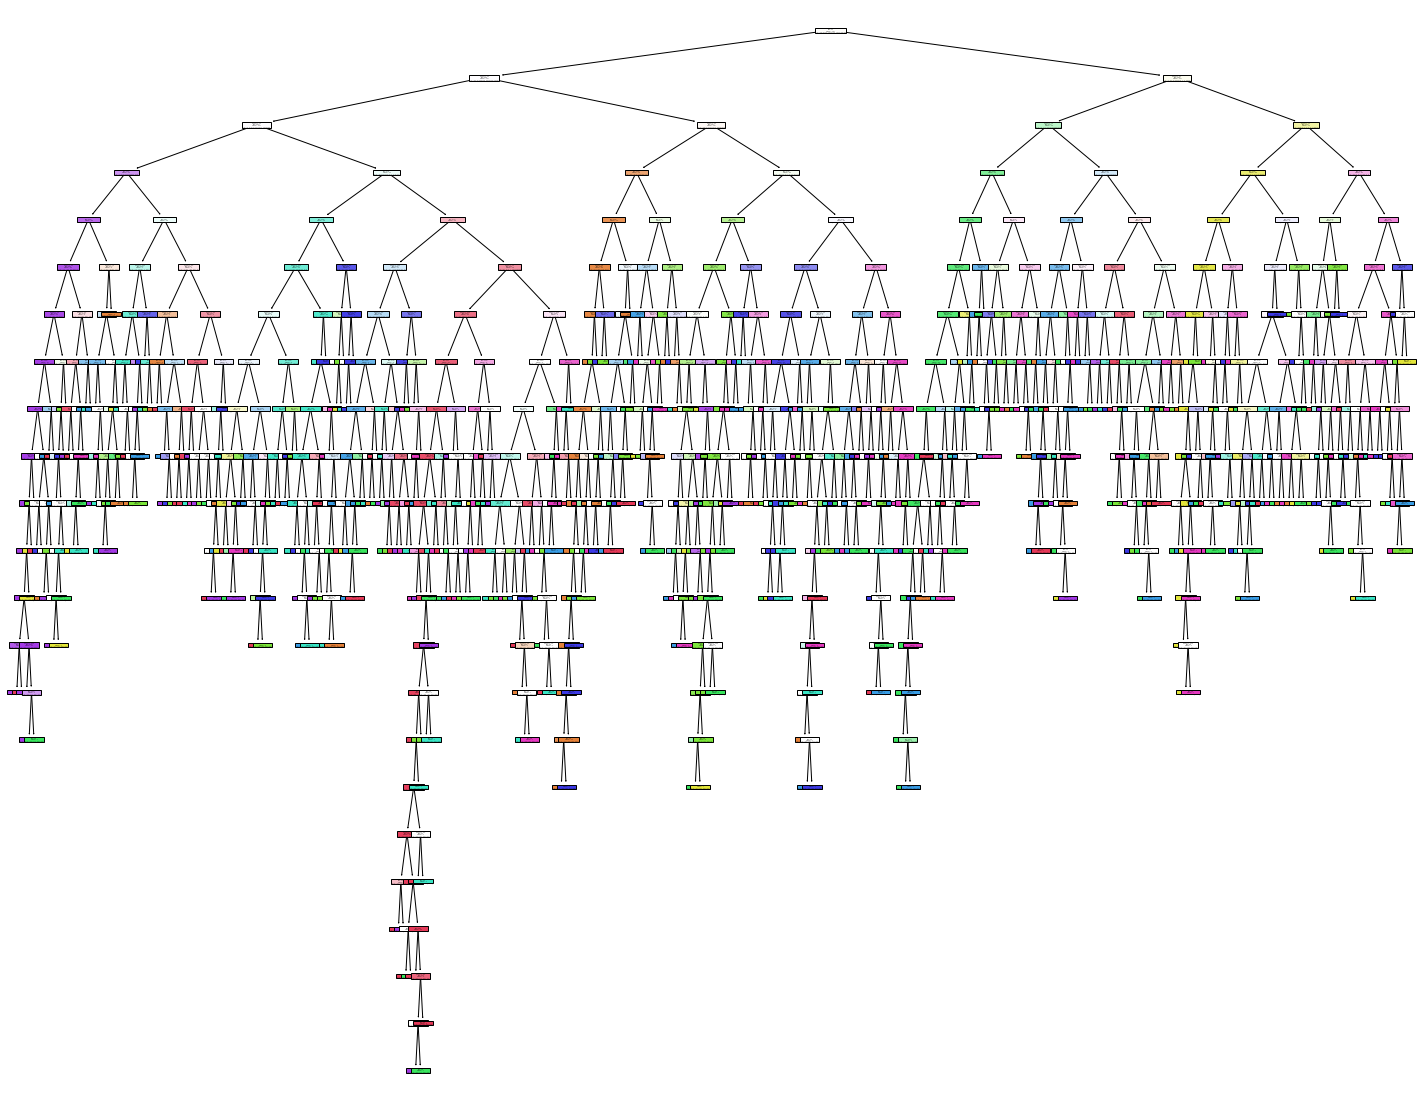

In [31]:
fig = plt.figure(figsize = (25, 20))
_fig = tree.plot_tree(tree_clf, feature_names = train.columns[1:],
                      # class_names = train.columns[0],
                      filled = True)

In [35]:
for i in range(15):
    for j in range(15):
        tree_clf_loop = DecisionTreeClassifier(max_depth = i + 1, min_samples_leaf = j + 1, random_state = 2022)
        tree_clf_loop.fit(train_images, train_labels)
        modelAccuracy_loop = metrics.accuracy_score(test_labels, tree_clf_loop.predict(test_images))
        print("max_depth: ", i + 1, "min_samples_leaf: ", j + 1, "Accuracy: ", modelAccuracy_loop)

max_depth:  1 min_samples_leaf:  1 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  2 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  3 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  4 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  5 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  6 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  7 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  8 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  9 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  10 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  11 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  12 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  13 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  14 Accuracy:  0.20438303954263934
max_depth:  1 min_samples_leaf:  15 Accuracy:  0.20438303954263934
max_

In [41]:
tree_clf2 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 1, random_state = 2022)

tree_clf2.fit(train_images, train_labels)

DecisionTreeClassifier(max_depth=10, random_state=2022)

In [42]:
print("Accuracy:", metrics.accuracy_score(test_labels, tree_clf2.predict(test_images)))

Accuracy: 0.7844211529299666


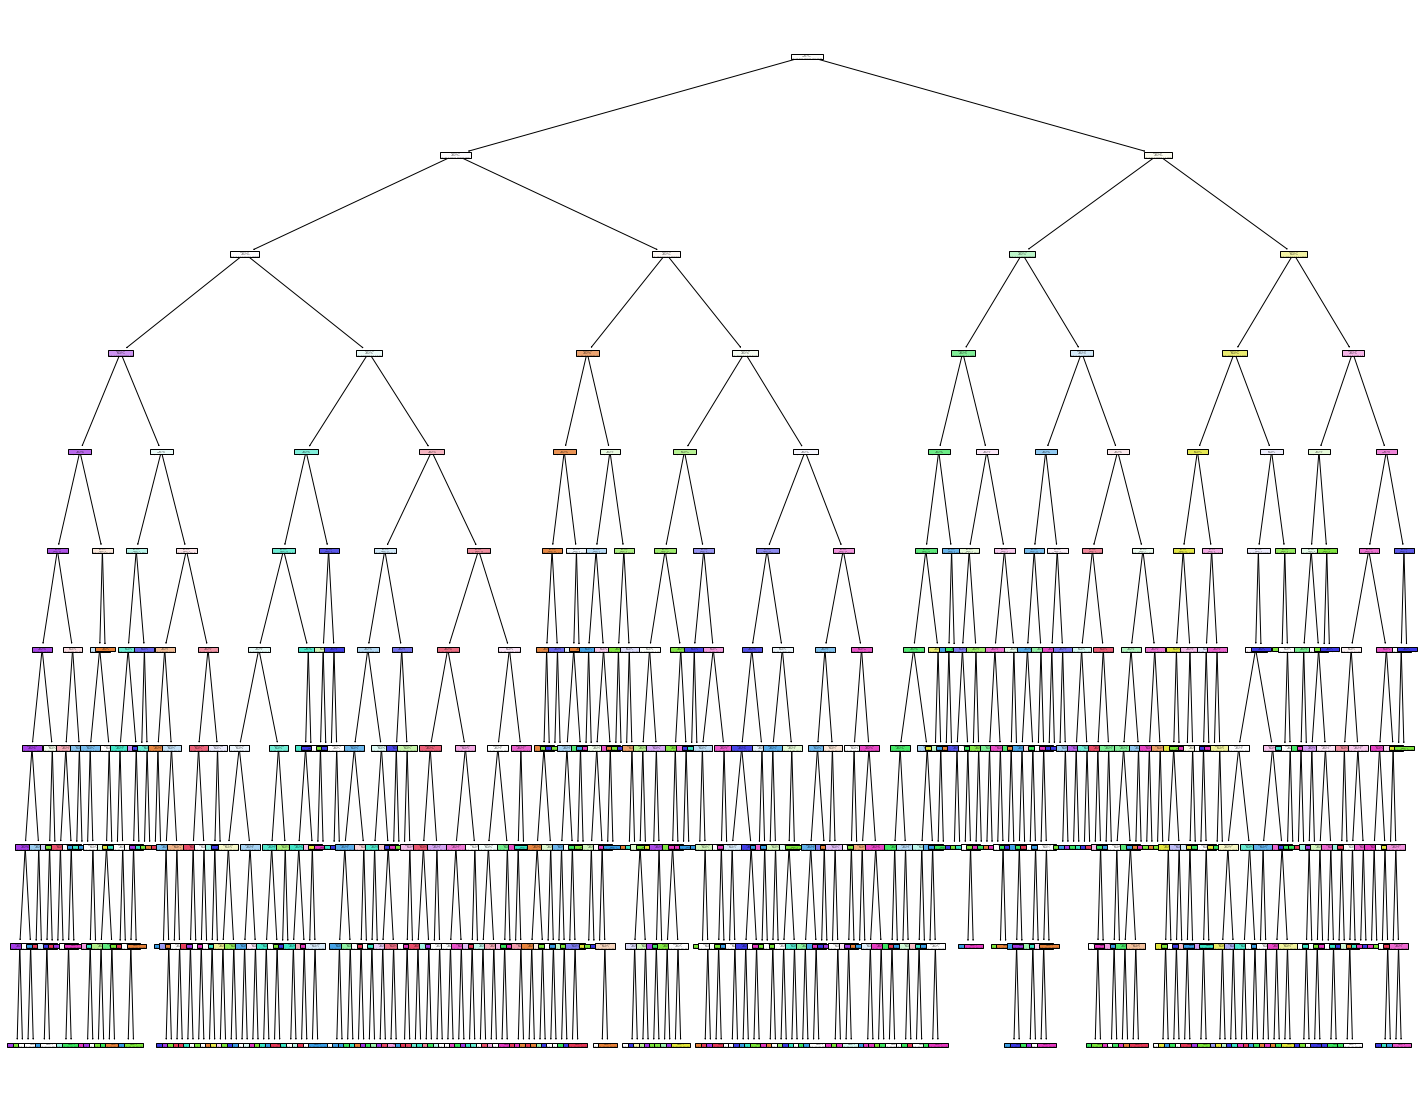

In [43]:
fig2 = plt.figure(figsize = (25,20))
fig2_ = tree.plot_tree(tree_clf2, feature_names = train.columns[1:],
                      #  class_names = train.columns[0],
                       filled = True)

In [44]:
tree = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 1, criterion = 'gini', random_state = 2022)
tree.fit(train_images, train_labels)

DecisionTreeClassifier(max_depth=10, random_state=2022)

In [45]:
# train score
tree.score(train_images, train_labels.values.ravel())

0.9590281086231539

In [46]:
# test score
tree.score(test_images, test_labels.values.ravel())

0.7844211529299666

78% accuracy on test data

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Creating a pipeline that consists of steps : Scaling and Decision tree classifier

pipeline = make_pipeline(StandardScaler(), tree)

# The max_depth parameter in the model defines the maximum allowed size to which the decision tree is allowed to expand while, the min_samples_leaf paramter defines the minimum sample leaves needed in the decision tree

In [48]:
pipeline.fit(train_images, train_labels)
predict = pipeline.predict(train_images)

trainAccuracy = accuracy_score(train_labels, pipeline.predict(train_images))
# trainAccuracy
print("Train Data Accuracy :{} %".format(round((trainAccuracy * 100), 2)))

Train Data Accuracy :95.9 %


In [ ]:
# from sklearn import tree
# from sklearn.tree import export_graphviz
# fig = plt.figure(figsize = (25,20))
# fig_ = tree.plot_tree(tree, feature_names = train.columns[1:], class_names = train.columns[0], filled = True)

### Cross validation

K-fold cross validation is a data splitting technique that can be implemented with k > 1 folds. The conventional technique for training and testing the model is to split the data in two different splits which are termed as training and test split but this technique has it's disadvantages as models tend to overfit to test data and cannot perform for un-seen data. To overcome this cross-validation is used that creates K-folds of training data in which (K-1) fold is used for training and the remaining fold is used for testing. This process is repeated for K times and the model performance is calculated for a particular set of hyperparameters by taking the mean and standard deviation of all the K models created.

In [49]:
# Cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate model
scores = cross_val_score(pipeline, train_images, train_labels, scoring = 'accuracy', cv = 5, n_jobs = -1)

In [50]:
print("Cross-validation Training accuracy scores %s" %scores)

print("Cross-validation Training accuracy: %.3f +/- %.3f" %(np.mean(scores) * 100, np.std(scores) * 100))

Cross-validation Training accuracy scores [0.76428571 0.73095238 0.75714286 0.74016687 0.76042908]
Cross-validation Training accuracy: 75.060 +/- 1.282


In [51]:
# predict 

# Now predicting the digits from the test dataset and computing the performance of the model with test dataset

result = pipeline.predict(test_images)

testAccuracy = accuracy_score(test_labels, result)
# testaccuracy
print("Test Data Accuracy    :{} %".format(round((testAccuracy * 100), 2)))

Test Data Accuracy    :78.44 %


## Naive Bayes

Naive Bayes is a classification technique based on the Bayes theorem. It is a simple but powerful algorithm for predictive modeling under supervised learning algorithms.The specific Naive Bayes model we use here is the Gaussian Naive Bayes. This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.

In [52]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf = MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(train_images, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [53]:
# test the classifier on the test data set, print accuracy score

nb_clf.score(test_images, test_labels)

0.8175321581705574

In [56]:
# print confusion matrix (row: ground truth; col: prediction)

from sklearn.metrics import confusion_matrix
y_pred_mnb = nb_clf.fit(train_images, train_labels).predict(test_images)
cm_mnb = confusion_matrix(test_labels, y_pred_mnb)
print(cm_mnb)

[[380   0   0   2   0   7   6   0  19   0]
 [  0 445   6   5   0   0   1   0  19   2]
 [  3   7 352   9   6   2  12   3  25   1]
 [  2   8  25 348   2  15   6   3  20  17]
 [  1   1   3   0 290   1   5   0  12  91]
 [ 11   5   2  55   5 268   5   1  25  11]
 [  6   0   4   0   5  14 368   0   7   0]
 [  2   8   1   1  28   0   1 366   8  50]
 [  4  24   9  23   4  16   3   1 297  12]
 [  0   1   1   7  32   1   0   9  17 318]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# print classification report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(test_labels, y_pred_mnb, average=None))
print(recall_score(test_labels, y_pred_mnb, average=None))

from sklearn.metrics import classification_report
# target_names = ['0','1']
print(classification_report(test_labels, y_pred_mnb))

[0.92909535 0.89178357 0.87344913 0.77333333 0.77956989 0.82716049
 0.9041769  0.95561358 0.66146993 0.63346614]
[0.9178744  0.93096234 0.83809524 0.78026906 0.71782178 0.69072165
 0.91089109 0.78709677 0.75572519 0.8238342 ]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       414
           1       0.89      0.93      0.91       478
           2       0.87      0.84      0.86       420
           3       0.77      0.78      0.78       446
           4       0.78      0.72      0.75       404
           5       0.83      0.69      0.75       388
           6       0.90      0.91      0.91       404
           7       0.96      0.79      0.86       465
           8       0.66      0.76      0.71       393
           9       0.63      0.82      0.72       386

    accuracy                           0.82      4198
   macro avg       0.82      0.82      0.82      4198
weighted avg       0.83      0.82      0.82      4198



In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# initialize the MNB model
g_nb_clf = GaussianNB()

# use the training data to train the MNB model
g_nb_clf.fit(train_images, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [58]:
g_nb_clf.score(test_images, test_labels)

0.5266793711291091

In [61]:
y_pred_gnb = g_nb_clf.fit(train_images, train_labels).predict(test_images)
cm_gnb = confusion_matrix(test_labels, y_pred_gnb)
print(cm_gnb)

[[385   3   4   1   0   4   8   0   3   6]
 [  1 443   5   6   0   1   6   0   9   7]
 [ 50  23 148  30   3   7  89   1  65   4]
 [107  49  12 116   2   3  20   5  77  55]
 [ 24  10   7   5  40  15  37   0  76 190]
 [101  17   4  12   1  43  18   1 157  34]
 [ 12   3   5   0   1   3 375   0   4   1]
 [  4   6   1   1   3   4   3 132   7 304]
 [ 25  96   2   2   3  12   8   0 172  73]
 [  3   6   1   0   1   1   0   9   8 357]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
print(classification_report(test_labels, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.54      0.93      0.68       414
           1       0.68      0.93      0.78       478
           2       0.78      0.35      0.49       420
           3       0.67      0.26      0.37       446
           4       0.74      0.10      0.17       404
           5       0.46      0.11      0.18       388
           6       0.66      0.93      0.77       404
           7       0.89      0.28      0.43       465
           8       0.30      0.44      0.35       393
           9       0.35      0.92      0.50       386

    accuracy                           0.53      4198
   macro avg       0.61      0.53      0.47      4198
weighted avg       0.62      0.53      0.48      4198



In [67]:
# cross validation

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
mnb_clf_pipe = Pipeline([('pca', PCA()), ('nb', MultinomialNB()),])
# mnb_clf_pipe.fit(train_images, train_labels)
scores_mnb = cross_val_score(mnb_clf_pipe, train_images, train_labels, cv = 5)
avg_mnb = sum(scores_mnb) / len(scores_mnb)
gnb_clf_pipe = Pipeline([('pca', PCA()), ('estimator', GaussianNB()),])
gnb_clf_pipe.fit(train_images, train_labels)
scores_gnb = cross_val_score(gnb_clf_pipe, train_images, train_labels, cv = 5)
avg_gnb = sum(scores_gnb) / len(scores_gnb)
print(avg_mnb)
print(avg_gnb)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

nan
0.49738180373460467


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
# Create a pipeline which first performs PCA on the train dataset followed by creating the GaussianNB()
pipe = Pipeline(steps=[('pca', PCA()), ('estimator', GaussianNB()), ])

pipe.fit(train_images, train_labels)

trainaccuracy = accuracy_score(train_labels, pipe.predict(train_images))
print("Train Data Accuracy    :{} %".format(round((trainaccuracy * 100), 2)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Data Accuracy    :48.69 %


In [ ]:
# Cross-validation

scores = cross_val_score(pipe, train_images, train_labels, cv = 5, scoring = 'accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
print(scores)
print("Cross-validation Training accuracy: %.3f +/- %.3f" %(np.mean(scores) * 100, np.std(scores) * 100))

[0.48095238 0.46785714 0.53452381 0.48510131 0.51847437]
Cross-validation Training accuracy: 49.738 +/- 2.497


The base model accuracy on training dataset was 48.69% and accuracy after performing 5-fold cross validation is 49.74%. So, the 5-fold cross-validation accuracy does not result in performance improvement for this model.

### Hypertuning parameters

In [ ]:
parameters = {'estimator__var_smoothing': [1e-11, 1e-10, 1e-9]}
Bayes = GridSearchCV(pipe, parameters, scoring = 'accuracy', cv = 5).fit(train_images, train_labels)
print(Bayes.best_estimator_)
print('best score:')
print(Bayes.best_score_)
# Bayes.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Pipeline(steps=[('pca', PCA()), ('estimator', GaussianNB(var_smoothing=1e-10))])
best score:
0.4983344684715364


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predictions = Bayes.best_estimator_.predict(test_images)
print(predictions)

[0 8 9 ... 5 0 1]


The accuracy of the Naive Bayes model with 5-fold cross validation is 52.072%

The Naive Bayes model yields an accuracy of approximately 50% on the given test set while Decision tree gives an accuracy of 77.16%. Clearly, Decision tree model performs better than Naive Bayes model.

Decision tree is a discriminative model, whereas Naive bayes is a generative model. Decision trees are more flexible and easy and perform better when there is lots of data. Naive Bayes on the other hand performs better with less data.